# Imports

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import csv
from bs4 import BeautifulSoup

# Web Scraping vs Web Crawling

<pre>
<span style="color:rgb(0,0,255);">Web scraping</span> :
The process of processing a web document and extracting information out of it.
You can do web scraping without doing web crawling.

<span style="color:rgb(0,0,255);">Web crawling</span> :
The process of iteratively finding and fetching web links starting from a list of seed URL's. 
Strictly speaking, to do web crawling, you have to do some degree of web scraping (to extract the URL's.)
</pre>

<p>
Steps of Web Scraping :
</p>
<ol>
    <li>Find the URL that you want to scrape</li>
    <li>Inspecting the Page</li>
    <li>Find the data you want to extract</li>
    <li>Write the code</li>
    <li>Run the code and extract the data</li>
    <li>Store the data in the required format</li>
</ol>

# HTML & Markdown

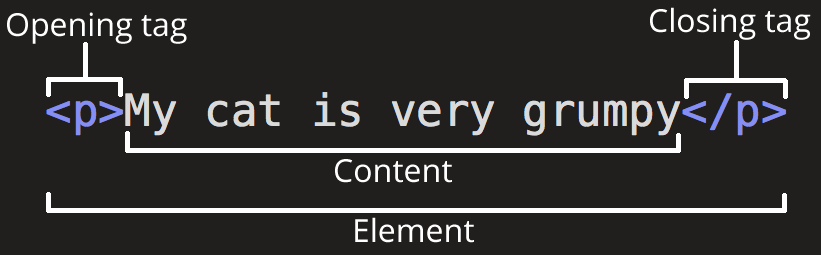

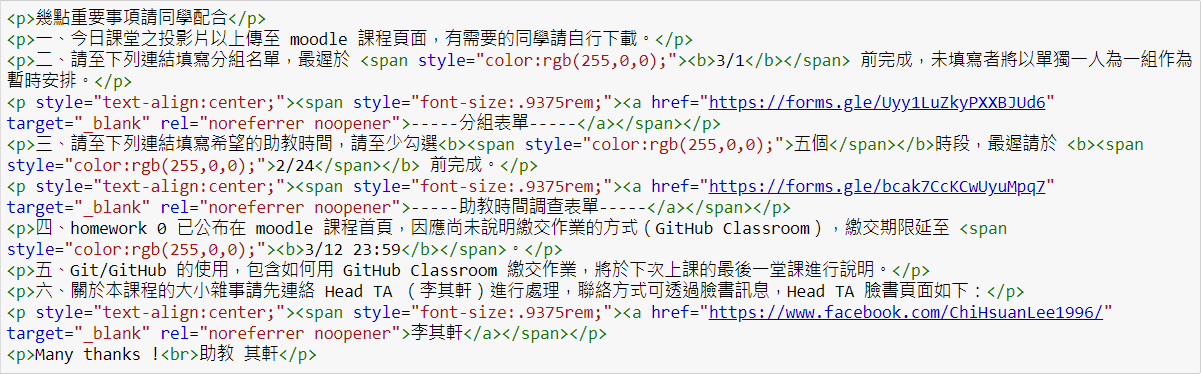

<p>幾點重要事項請同學配合</p>
<p>一、今日課堂之投影片以上傳至 moodle 課程頁面，有需要的同學請自行下載。</p>
<p>二、請至下列連結填寫分組名單，最遲於 <span style="color:rgb(255,0,0);"><b>3/1</b></span> 前完成，未填寫者將以單獨一人為一組作為暫時安排。</p>
<p style="text-align:center;"><span style="font-size:.9375rem;"><a href="https://forms.gle/Uyy1LuZkyPXXBJUd6" target="_blank" rel="noreferrer noopener">-----分組表單-----</a></span></p>
<p>三、請至下列連結填寫希望的助教時間，請至少勾選<b><span style="color:rgb(255,0,0);">五個</span></b>時段，最遲請於 <b><span style="color:rgb(255,0,0);">2/24</span></b> 前完成。</p>
<p style="text-align:center;"><span style="font-size:.9375rem;"><a href="https://forms.gle/bcak7CcKCwUyuMpq7" target="_blank" rel="noreferrer noopener">-----助教時間調查表單-----</a></span></p>
<p>四、homework 0 已公布在 moodle 課程首頁，因應尚未說明繳交作業的方式（GitHub Classroom），繳交期限延至 <span style="color:rgb(255,0,0);"><b>3/12 23:59</b></span>。</p>
<p>五、Git/GitHub 的使用，包含如何用 GitHub Classroom 繳交作業，將於下次上課的最後一堂課進行說明。</p>
<p>六、關於本課程的大小雜事請先連絡 Head TA （李其軒）進行處理，聯絡方式可透過臉書訊息，Head TA 臉書頁面如下：</p>
<p style="text-align:center;"><span style="font-size:.9375rem;"><a href="https://www.facebook.com/ChiHsuanLee1996/" target="_blank" rel="noreferrer noopener">李其軒</a></span></p>
<p>Many thanks !<br>助教 其軒</p>

# Regular Expression (regex / regexp)

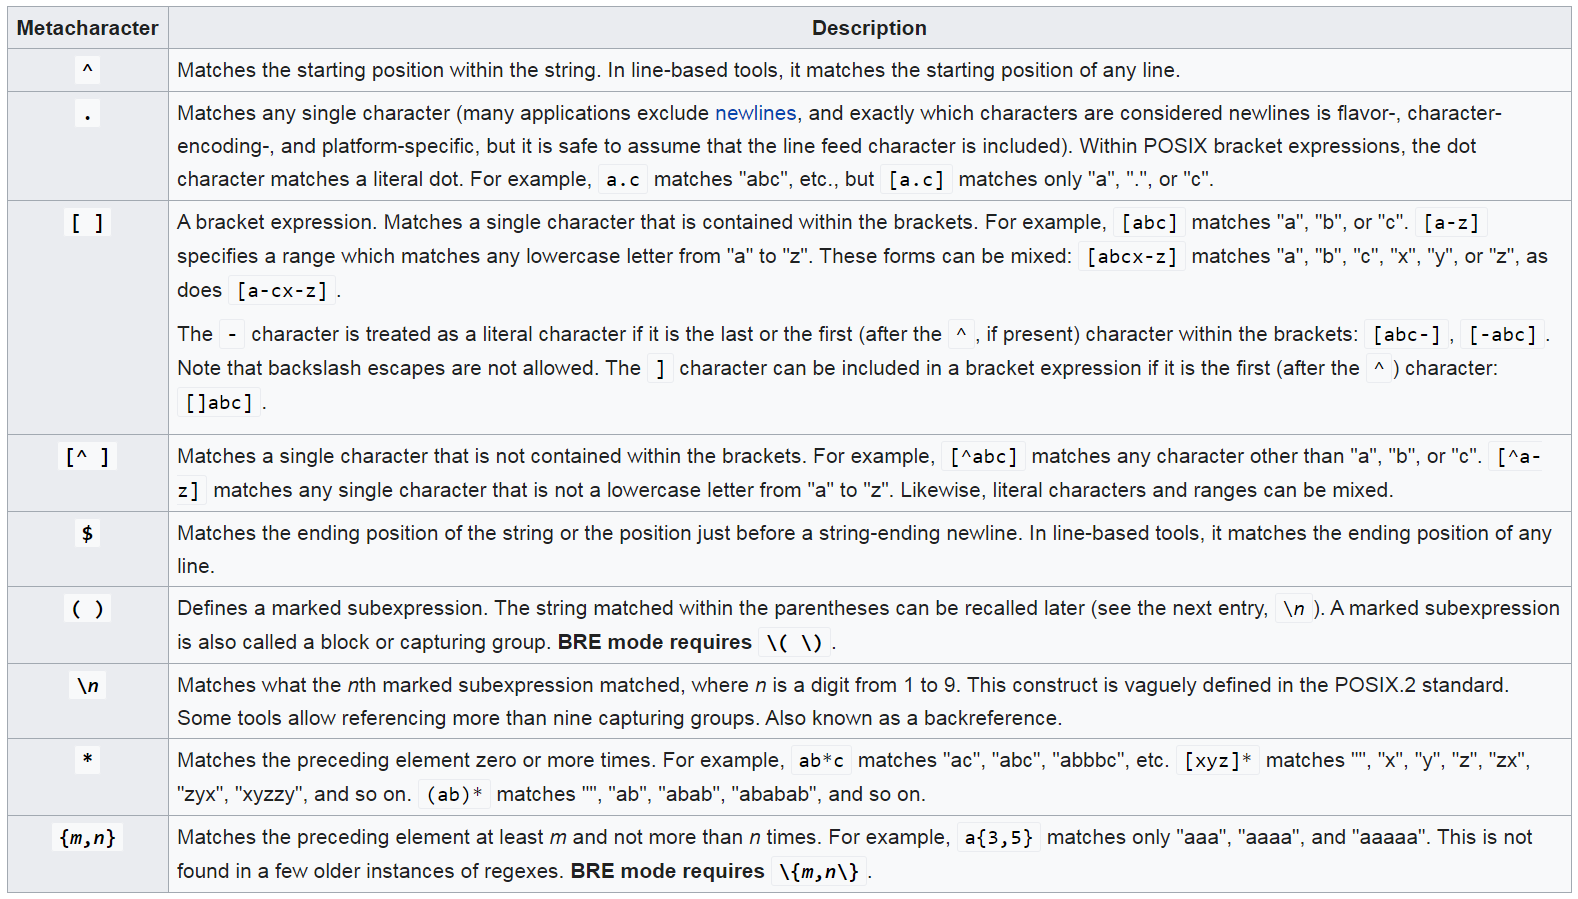

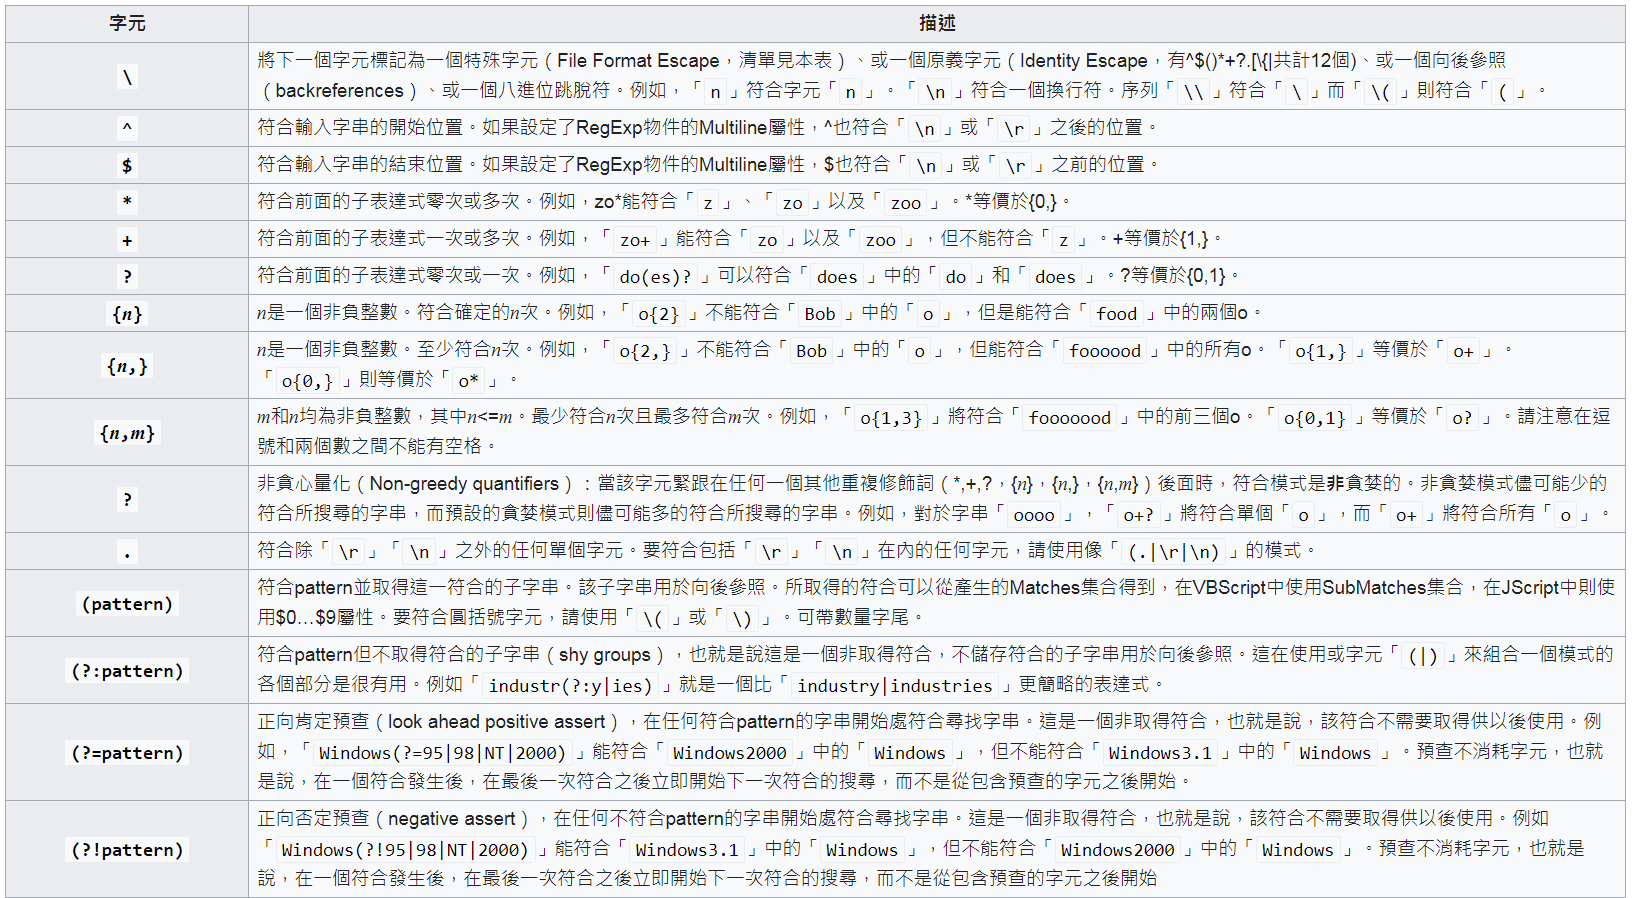

In [2]:
resp_ncku = requests.get('https://web.ncku.edu.tw/')
soup_ncku = BeautifulSoup(resp_ncku.text, 'html.parser')

### find h1 - h6

In [3]:
titles = soup_ncku.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
for title in titles:
    print(title.text.strip())

故事．觀點
成大快訊
近期活動


### use regular expression to make things easier

In [4]:
for title in soup_ncku.find_all(re.compile('h[1-6]')):
    print(title.text.strip())

故事．觀點
成大快訊
近期活動


# Requests

### Get

In [5]:
url = 'https://web.ncku.edu.tw/'
page = requests.get(url, params=None)
print(page.status_code)
print(page.ok)

200
True


In [6]:
page.encoding

'UTF-8'

In [7]:
page.url

'https://web.ncku.edu.tw/'

In [8]:
page.headers['Content-Type']

'text/html; charset=UTF-8'

In [9]:
print(type(page.content))
print('================')
page.content[:500]   # To see the response’s content in data type - bytes

<class 'bytes'>


b'<!DOCTYPE html>\n<html lang="zh-tw">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<meta name="viewport" content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0">\n<meta name="apple-mobile-web-app-capable" content="yes">\n<meta name="apple-mobile-web-app-status-bar-style" content="black">\n<meta name="keywords" content="National Cheng Kung University, NCKU, CK, Cheng Kung, \xe6\x88\x90\xe5\xa4\xa7, '

In [10]:
print(type(page.text))
print('================')
page.text[:500]

<class 'str'>


'<!DOCTYPE html>\n<html lang="zh-tw">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<meta name="viewport" content="initial-scale=1.0, user-scalable=1, minimum-scale=1.0, maximum-scale=3.0">\n<meta name="apple-mobile-web-app-capable" content="yes">\n<meta name="apple-mobile-web-app-status-bar-style" content="black">\n<meta name="keywords" content="National Cheng Kung University, NCKU, CK, Cheng Kung, 成大, 成功大學'

### Post

In [11]:
url_post = "https://httpbin.org/post"
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post(url_post, data=payload)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key1": "value1", 
    "key2": "value2"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "23", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-60859480-69ec2d5e6d34d8ce0146d4cc"
  }, 
  "json": null, 
  "origin": "1.173.187.7", 
  "url": "https://httpbin.org/post"
}



### Adding parameters with Get

In [12]:
my_params = {'q': 'ncku'}
google_ncku_html = requests.get("https://www.google.com/search?", params = my_params)

r_ncku = requests.get('https://www.google.com/search?q=ncku')

In [13]:
google_ncku_html.url == r_ncku.url

True

In [14]:
google_ncku_html.content == r_ncku.content

False

In [15]:
google_ncku_html.content[:50] == r_ncku.content[:50]

True

<pre>
<span style="color:rgb(0,50,100);"><b>============</b></span>
<a href="https://www.w3schools.com/tags/ref_httpmethods.asp" target="_blank" rel="noreferrer noopener">Get vs. Post</a>
<span style="color:rgb(0,50,100);"><b>============</b></span>
</pre>

### Header

In [16]:
url_zh = "https://zhuanlan.zhihu.com/"

r1 = requests.get(url_zh)
r1.ok      
# Cannot web scraping directly

False

In [17]:
# add header
my_headers = {'user-agent': 'anything'}     
r2 = requests.get(url_zh, headers = my_headers)
r2.ok

True

# BeautifulSoup 

### A simple html example

In [18]:
with open('simple.html') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')

In [19]:
print(soup)

<!DOCTYPE html>
<html class="no-js" lang="">
<head>
<title>Test - A Sample Website</title>
<meta charset="utf-8"/>
<link href="css/normalize.css" rel="stylesheet"/>
<link href="css/main.css" rel="stylesheet"/>
</head>
<body>
<h1 id="site_title">Test Website</h1>
<hr/>
<div class="article">
<h2><a href="article_1.html">Article 1 Headline</a></h2>
<p>This is a summary of article 1</p>
</div>
<hr/>
<div class="article">
<h2><a href="article_2.html">Article 2 Headline</a></h2>
<p>This is a summary of article 2</p>
</div>
<hr/>
<div class="footer">
<p>Footer Information</p>
</div>
<script src="js/vendor/modernizr-3.5.0.min.js"></script>
<script src="js/plugins.js"></script>
<script src="js/main.js"></script>
</body>
</html>


In [20]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="">
 <head>
  <title>
   Test - A Sample Website
  </title>
  <meta charset="utf-8"/>
  <link href="css/normalize.css" rel="stylesheet"/>
  <link href="css/main.css" rel="stylesheet"/>
 </head>
 <body>
  <h1 id="site_title">
   Test Website
  </h1>
  <hr/>
  <div class="article">
   <h2>
    <a href="article_1.html">
     Article 1 Headline
    </a>
   </h2>
   <p>
    This is a summary of article 1
   </p>
  </div>
  <hr/>
  <div class="article">
   <h2>
    <a href="article_2.html">
     Article 2 Headline
    </a>
   </h2>
   <p>
    This is a summary of article 2
   </p>
  </div>
  <hr/>
  <div class="footer">
   <p>
    Footer Information
   </p>
  </div>
  <script src="js/vendor/modernizr-3.5.0.min.js">
  </script>
  <script src="js/plugins.js">
  </script>
  <script src="js/main.js">
  </script>
 </body>
</html>


In [21]:
print(soup.title)
print(soup.title.text)

<title>Test - A Sample Website</title>
Test - A Sample Website


In [22]:
soup.find('div')    # only find the first div

<div class="article">
<h2><a href="article_1.html">Article 1 Headline</a></h2>
<p>This is a summary of article 1</p>
</div>

In [23]:
soup.find('div', class_='footer') 

<div class="footer">
<p>Footer Information</p>
</div>

In [24]:
article = soup.find('div', class_='article')

In [25]:
headline = article.h2.a.text
print(headline)

Article 1 Headline


In [26]:
summary = article.p.text
print(summary)

This is a summary of article 1


### Get content from a real website

In [27]:
source = requests.get('http://coreyms.com').text
soup = BeautifulSoup(source, 'lxml')

In [28]:
article = soup.find('article')

In [29]:
# print(article.prettify())
summary = article.find('div', class_='entry-content').p.text    # without .p.text ?
print(summary)

In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…


In [30]:
vid_src = article.find('iframe', class_='youtube-player')
print(type(vid_src))
print(vid_src)

<class 'bs4.element.Tag'>
<iframe allowfullscreen="true" class="youtube-player" height="360" sandbox="allow-scripts allow-same-origin allow-popups allow-presentation" src="https://www.youtube.com/embed/z0gguhEmWiY?version=3&amp;rel=1&amp;showsearch=0&amp;showinfo=1&amp;iv_load_policy=1&amp;fs=1&amp;hl=en-US&amp;autohide=2&amp;wmode=transparent" style="border:0;" width="640"></iframe>


In [31]:
vid_src = article.find('iframe', class_='youtube-player')['src']
print(type(vid_src))
print(vid_src)

<class 'str'>
https://www.youtube.com/embed/z0gguhEmWiY?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent


In [32]:
vid_id = vid_src.split('/')
print(vid_id)

['https:', '', 'www.youtube.com', 'embed', 'z0gguhEmWiY?version=3&rel=1&showsearch=0&showinfo=1&iv_load_policy=1&fs=1&hl=en-US&autohide=2&wmode=transparent']


In [33]:
vid_id = vid_src.split('/')[4]
vid_id = vid_id.split('?')[0]
print(vid_id)

z0gguhEmWiY


In [34]:
yt_link = f'https://youtube.com/watch?v={vid_id}'
print(yt_link)

https://youtube.com/watch?v=z0gguhEmWiY


### Loop over the page and write the information into a csv file

In [35]:
csv_file = open('cms_scrape.csv','w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['headline', 'summary', 'video_link'])

29

### try...except... is useful in some situation

In [36]:
for article in soup.find_all('article'):
    headline = article.h2.a.text
    print(headline)

    summary = article.find('div', class_='entry-content').p.text
    print(summary)

    try:
        vid_src = article.find('iframe', class_='youtube-player')['src']

        vid_id = vid_src.split('/')[4]
        vid_id = vid_id.split('?')[0]

        yt_link = f'https://youtube.com/watch?v={vid_id}'
    except:
        yt_link = None

    print(yt_link)

    print()

    csv_writer.writerow([headline, summary, yt_link])

csv_file.close()

Python Tutorial: Zip Files – Creating and Extracting Zip Archives
In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
https://youtube.com/watch?v=z0gguhEmWiY

Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey
In this Python Programming video, we will be learning how to download and analyze real-world data from the 2019 Stack Overflow Developer Survey. This is terrific practice for anyone getting into the data science field. We will learn different ways to analyze this data and also some best practices. Let’s get started…
https://youtube.com/watch?v=_P7X8tMplsw

Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module
In this Python Programming video, we will be learning how t

In [37]:
df = pd.read_csv('cms_scrape.csv')
df

,headline,summary,video_link
0,Python Tutorial: Zip Files – Creating and Extr...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
1,Python Data Science Tutorial: Analyzing the 20...,"In this Python Programming video, we will be l...",https://youtube.com/watch?v=_P7X8tMplsw
2,Python Multiprocessing Tutorial: Run Code in P...,"In this Python Programming video, we will be l...",https://youtube.com/watch?v=fKl2JW_qrso
3,Python Threading Tutorial: Run Code Concurrent...,"In this Python Programming video, we will be l...",https://youtube.com/watch?v=IEEhzQoKtQU
4,Update (2019-09-03),Hey everyone. I wanted to give you an update o...,NaN
5,Python Quick Tip: The Difference Between “==” ...,"In this Python Programming Tutorial, we will b...",https://youtube.com/watch?v=mO_dS3rXDIs
6,Python Tutorial: Calling External Commands Usi...,"In this Python Programming Tutorial, we will b...",https://youtube.com/watch?v=2Fp1N6dof0Y
7,Visual Studio Code (Windows) – Setting up a Py...,"In this Python Programming Tutorial, we will b...",https://youtube.com/watch?v=-nh9rCzPJ20
8,Visual Studio Code (Mac) – Setting up a Python...,"In this Python Programming Tutorial, we will b...",https://youtube.com/watch?v=06I63_p-2A4
9,Clarifying the Issues with Mutable Default Arg...,"In this Python Programming Tutorial, we will b...",https://youtube.com/watch?v=_JGmemuINww


# Reference

<ul>
    <li><a href="https://dzone.com/articles/web-scraping-vs-web-crawling-whats-the-difference" target="_blank"                     rel="noreferrer noopener">Web Scraping vs Web Crawling: What’s the Difference?</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Web_scraping" target="_blank" rel="noreferrer noopener">
        Web scraping</a></li>
    <li><a href="https://stackoverflow.com/questions/4327392/what-is-the-difference-between-web-crawling-and-web-scraping"         target="_blank" rel="noreferrer noopener">stackoverflow : crawler vs scraper</a></li>
    <li><a href="https://youtu.be/ng2o98k983k" target="_blank" rel="noreferrer noopener">Python Tutorial: Web Scraping with         BeautifulSoup and Requests</a></li>
    <li><a href="https://developer.mozilla.org/zh-TW/docs/Learn/Getting_started_with_the_web/HTML_basics" target="_blank" 
        rel="noreferrer noopener">HTML Basics</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Regular_expression" target="_blank" rel="noreferrer noopener">Regular 
        expression</a></li>
    <li><a href="https://docs.python-requests.org/en/master/" target="_blank" rel="noreferrer noopener">Python Requests</a>
        </li>
    <li>Slides from 陳知遙 (privious TA in NetAI lab)</li>
    <li>Technical presentation from 王翊芃 and 吳炫德 (STAT 110)</li>
</ul>

